In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.strategy.indicators.notebook_utils import loadData
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [3]:
dataset, features = loadData(indicators=['rsi', 'natr', 'ultimate_oscillator', 'optimal_v2'],
                            param_spec={},
                            optimal_threshold=0.8,
                            optimal_mode='buy',
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]}
                                    ],

                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from chunk 11...


In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset

,time,high,low,close,open,volume,RSI,NATR,UltimateOscillator,Optimal_v2,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
500,1502972579999,4430.95,4430.95,4431.770137,4430.95,0.000000,0.453555,0.034509,0.794960,0.0,...,0.423552,0.392293,0.475551,0.460325,0.455688,0.557442,0.203105,0.165680,0.160616,0.163766
501,1502972639999,4430.95,4427.30,4431.360069,4427.30,3.614797,0.453555,0.034540,0.800700,0.0,...,0.423539,0.393517,0.475551,0.460325,0.455688,0.557442,0.203105,0.165680,0.160616,0.163766
502,1502972699999,4430.95,4427.30,4429.330034,4430.95,4.773240,0.441018,0.034612,0.795942,0.0,...,0.422347,0.393281,0.462970,0.486519,0.442607,0.545671,0.197725,0.174617,0.155794,0.159076
503,1502972759999,4425.25,4425.25,4427.290017,4425.25,0.026000,0.434107,0.034599,0.791978,0.0,...,0.421085,0.389285,0.454350,0.478563,0.435395,0.481027,0.194044,0.171608,0.153135,0.136295
504,1502972819999,4423.20,4423.20,4425.245009,4423.20,0.940000,0.427255,0.034586,0.789331,0.0,...,0.419789,0.389308,0.445805,0.473496,0.428245,0.512226,0.190394,0.169641,0.150500,0.146404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,1606715999999,18524.07,18515.78,18519.207620,18516.15,5.437391,0.492830,0.064053,0.608142,0.0,...,0.425569,0.387816,0.477448,0.506112,0.465718,0.456943,0.203943,0.181977,0.164825,0.131905
1722409,1606719659999,18559.77,18512.90,18523.983810,18520.27,65.068932,0.501578,0.064290,0.609971,0.0,...,0.426304,0.388045,0.494979,0.506802,0.473094,0.472400,0.210987,0.182209,0.167435,0.136492
1722410,1606719719999,18530.08,18523.66,18525.301905,18528.89,15.367476,0.499362,0.064168,0.609395,0.0,...,0.428349,0.388864,0.492955,0.510220,0.494905,0.485892,0.210179,0.183429,0.175072,0.140253
1722411,1606719779999,18530.08,18520.47,18526.950952,18526.62,54.298657,0.501485,0.064061,0.612282,0.0,...,0.429491,0.388718,0.489399,0.518775,0.496661,0.478026,0.208712,0.186509,0.175710,0.138068


In [6]:
final_dataset = dataset

In [7]:
dataset = []

In [8]:
final_dataset

,time,high,low,close,open,volume,RSI,NATR,UltimateOscillator,Optimal_v2,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
500,1502972579999,4430.95,4430.95,4431.770137,4430.95,0.000000,0.453555,0.034509,0.794960,0.0,...,0.423552,0.392293,0.475551,0.460325,0.455688,0.557442,0.203105,0.165680,0.160616,0.163766
501,1502972639999,4430.95,4427.30,4431.360069,4427.30,3.614797,0.453555,0.034540,0.800700,0.0,...,0.423539,0.393517,0.475551,0.460325,0.455688,0.557442,0.203105,0.165680,0.160616,0.163766
502,1502972699999,4430.95,4427.30,4429.330034,4430.95,4.773240,0.441018,0.034612,0.795942,0.0,...,0.422347,0.393281,0.462970,0.486519,0.442607,0.545671,0.197725,0.174617,0.155794,0.159076
503,1502972759999,4425.25,4425.25,4427.290017,4425.25,0.026000,0.434107,0.034599,0.791978,0.0,...,0.421085,0.389285,0.454350,0.478563,0.435395,0.481027,0.194044,0.171608,0.153135,0.136295
504,1502972819999,4423.20,4423.20,4425.245009,4423.20,0.940000,0.427255,0.034586,0.789331,0.0,...,0.419789,0.389308,0.445805,0.473496,0.428245,0.512226,0.190394,0.169641,0.150500,0.146404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,1606715999999,18524.07,18515.78,18519.207620,18516.15,5.437391,0.492830,0.064053,0.608142,0.0,...,0.425569,0.387816,0.477448,0.506112,0.465718,0.456943,0.203943,0.181977,0.164825,0.131905
1722409,1606719659999,18559.77,18512.90,18523.983810,18520.27,65.068932,0.501578,0.064290,0.609971,0.0,...,0.426304,0.388045,0.494979,0.506802,0.473094,0.472400,0.210987,0.182209,0.167435,0.136492
1722410,1606719719999,18530.08,18523.66,18525.301905,18528.89,15.367476,0.499362,0.064168,0.609395,0.0,...,0.428349,0.388864,0.492955,0.510220,0.494905,0.485892,0.210179,0.183429,0.175072,0.140253
1722411,1606719779999,18530.08,18520.47,18526.950952,18526.62,54.298657,0.501485,0.064061,0.612282,0.0,...,0.429491,0.388718,0.489399,0.518775,0.496661,0.478026,0.208712,0.186509,0.175710,0.138068


In [9]:
# import joblib

# joblib.dump(mm_scalar, './mm_scalar.sav')

In [10]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [11]:

buy_signals = train[train['Optimal_v2'] == 1.0]

In [12]:
mean_num_singals = int(len(buy_signals))

In [13]:
not_signals = train[train['Optimal_v2'] == 0.0]


In [14]:
print(mean_num_singals, len(not_signals))

53645 1576947


In [15]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [16]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [17]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]

balanced_data_optimal_buy = balanced_data_buy[['Optimal_v2']]
balanced_data_buy = []



In [18]:
filtered_balanced_data_buy

,RSI,NATR,UltimateOscillator,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
1068495,0.515895,0.030659,0.535801,0.476480,0.487101,0.462605,0.614799,0.838003,0.754000,0.731352,...,0.431984,0.397750,0.493770,0.513020,0.522414,0.574952,0.210348,0.184346,0.185238,0.170185
438613,0.488100,0.074806,0.620040,0.476712,0.487972,0.488641,0.638388,0.803399,0.568199,0.601319,...,0.435011,0.393250,0.491537,0.518867,0.527122,0.561759,0.209699,0.186667,0.187658,0.165363
144737,0.517182,0.096006,0.749724,0.476459,0.487246,0.448362,0.445197,0.363892,0.529056,0.451379,...,0.426388,0.391103,0.495719,0.488938,0.463080,0.522699,0.211115,0.176186,0.164361,0.151934
620631,0.417274,0.016479,0.554864,0.476680,0.488388,0.486714,0.470663,1.000000,0.801732,0.666358,...,0.431688,0.395069,0.497659,0.526803,0.549277,0.621949,0.213369,0.190874,0.200457,0.195594
1065388,0.460873,0.051162,0.579980,0.476563,0.487738,0.458307,0.253111,0.868834,0.722364,0.522216,...,0.428411,0.393947,0.473854,0.497499,0.483904,0.527563,0.202414,0.178814,0.170875,0.152597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636338,0.491526,0.021124,0.616792,0.476715,0.487691,0.441048,0.522790,0.653837,0.328022,0.343015,...,0.428056,0.396258,0.470093,0.489033,0.456945,0.554524,0.201037,0.176010,0.161894,0.162635
1636389,0.460774,0.021847,0.591493,0.476564,0.487365,0.438881,0.086726,0.573663,0.453999,0.390838,...,0.427991,0.391663,0.478992,0.485449,0.466727,0.451539,0.204567,0.174458,0.164625,0.128923
1636459,0.462200,0.020712,0.611165,0.476693,0.487841,0.455025,0.146577,0.333333,0.119523,0.305699,...,0.429526,0.392771,0.479666,0.492436,0.480486,0.492716,0.204851,0.176974,0.169616,0.141043
1636502,0.402853,0.022610,0.584640,0.476485,0.487015,0.434882,0.096937,0.504730,0.252460,0.294662,...,0.425635,0.388032,0.435824,0.464337,0.447676,0.448446,0.185578,0.165707,0.156305,0.124825


In [22]:
from sklearn.inspection import permutation_importance

clf_buy = XGBClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=1)

clf_buy.fit(filtered_balanced_data_buy.values, balanced_data_optimal_buy.values)

feature_importances = permutation_importance(clf_buy, filtered_balanced_data_buy.values, balanced_data_optimal_buy.values, n_repeats=10, random_state=69420)

for i in range(len(feature_importances.importances_mean)):
    print('i: {}, Feature: {}, Score: {}'.format(i, filtered_balanced_data_buy.columns[i], feature_importances.importances_mean[i]))

[21:58:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { criterion, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


i: 0, Feature: RSI, Score: 0.00224169178032535
i: 1, Feature: NATR, Score: 0.0018011412475015254
i: 2, Feature: UltimateOscillator, Score: 0.0011288201240665986
i: 3, Feature: WILLR_close_period_3, Score: 0.0013800602727808919
i: 4, Feature: WILLR_close_period_5, Score: 0.0015298101718084767
i: 5, Feature: WILLR_close_period_10, Score: 0.0026780998539782663
i: 6, Feature: WILLR_close_period_30, Score: 0.002454199935791823
i: 7, Feature: CCI_close_period_3, Score: 0.0022487339609158497
i: 8, Feature: CCI_close_period_5, Score: 0.0026430960739842633
i: 9, Feature: CCI_close_period_10, Score: 0.016191215915328072
i: 10

In [23]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [ ]:
import pickle

In [24]:
filtered_test = test[["close", 'Optimal_v2', 'volume']]
filtered_test_2 = test[features]

In [25]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [26]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [27]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [28]:
len(filtered_test)

85821

In [29]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

872

In [30]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.Optimal_v2), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [31]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [32]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


['boll_upper', 'boll_upper']

In [33]:
reset_filtered = filtered_test.reset_index(drop=True)

In [34]:
# reset_filtered

In [35]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [36]:
# reset_filtered

In [43]:
first_amnt = reset_filtered[14000:16000]
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

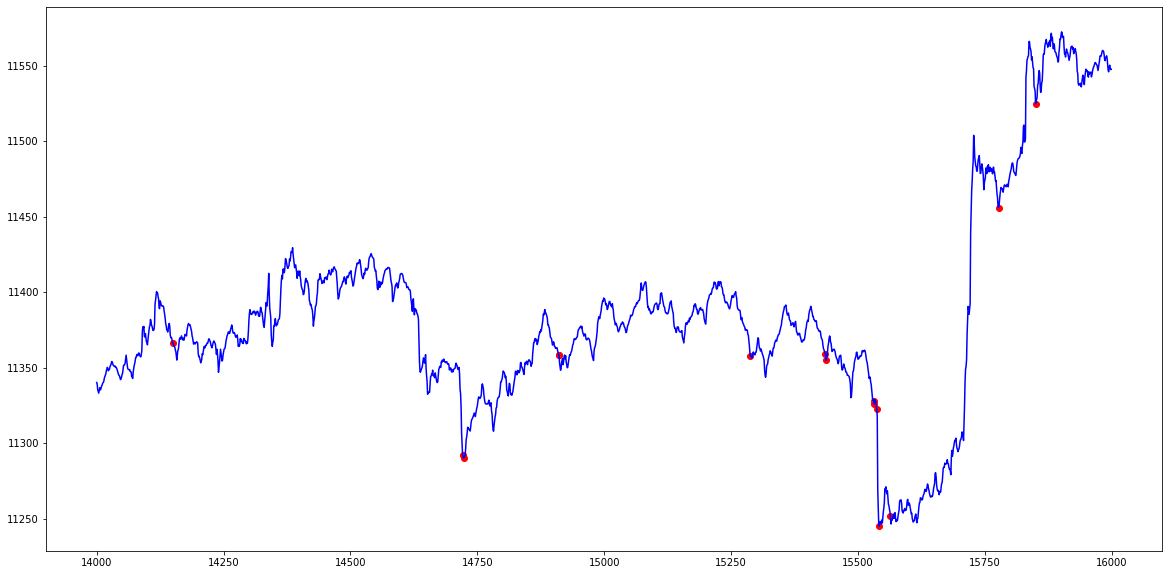

In [44]:
import matplotlib.pyplot as plt
plt.clf()

plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [37]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()

In [48]:
import pickle
pickle.dump(clf_buy, open("grad_boost_ross.sav", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)